In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# usada para pre proceso de los datos
from sklearn import preprocessing

In [78]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [79]:

# used for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [80]:
# Data set split
from sklearn.model_selection import train_test_split

In [81]:
# PCA
from sklearn.decomposition import PCA

In [82]:
# Logistic
from sklearn.linear_model import LogisticRegression

In [83]:
# performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [84]:
from matplotlib import pyplot

In [85]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud

In [86]:
# to handle imbalanced data set
from imblearn.over_sampling import SMOTE
from collections import Counter

In [87]:
from math import sqrt

In [88]:
data = pd.read_csv('creditcard.csv')

In [89]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
data.shape

(284807, 31)

In [92]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [93]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [94]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [95]:
X_data = data.iloc[:,0:30]
y_data = data.iloc[:,-1]

In [96]:
standard_scaler = preprocessing.StandardScaler()
X_standard_scaled_df = standard_scaler.fit_transform(X_data)

In [97]:
X_standard_scaled_df


array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [98]:
X_standard_scaled_df = pd.DataFrame(data=X_standard_scaled_df[:,:], columns=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [99]:
X_standard_scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [100]:
# Make an instance of the Model
pca = PCA(10)

pca_selected = pca.fit_transform(X_standard_scaled_df)

In [101]:
print(pca_selected.shape)

(284807, 10)


In [102]:
pca_selected_df = pd.DataFrame(data=pca_selected[:,:])

In [103]:
pca_selected_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.413127,2.543727,-0.624955,0.224470,-0.276529,-0.227374,0.195782,0.642562,-1.300620,0.062693
1,-0.399773,2.041686,-0.619729,0.000810,-0.391025,-0.127234,-0.044725,0.094495,0.504057,-0.317416
2,1.873244,2.508216,-0.160891,-0.072343,-0.711147,-0.308202,-0.376682,0.529677,-1.190365,-0.541915
3,0.310480,1.714966,1.148537,0.797504,1.366028,0.073802,-0.828685,1.074452,0.159225,0.653499
4,-0.001466,1.480198,1.189873,0.769593,-0.422738,-0.445407,-0.163249,0.764037,-0.787867,0.842499


In [104]:
ready_data = pca_selected_df.join(y_data)

In [105]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [106]:
data.Class.value_counts('1')

0    0.998273
1    0.001727
Name: Class, dtype: float64

/home/rafa/miniconda3/envs/deep/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


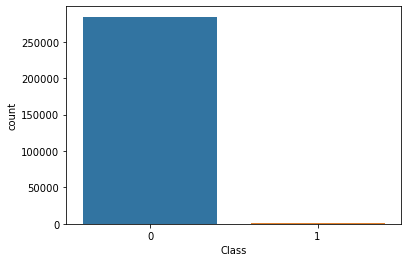

In [107]:
sns.countplot("Class", data=data)
plt.show()

In [108]:
data_class_0 = ready_data[ready_data['Class']==0]

In [109]:
data_class_0.shape

(284315, 11)

In [110]:
data_class_1 = ready_data[ready_data['Class']==1]

In [111]:
data_class_1.shape

(492, 11)

In [112]:
data_class_0.head()

,0,1,2,3,4,5,6,7,8,9,Class
0,0.413127,2.543727,-0.624955,0.224470,-0.276529,-0.227374,0.195782,0.642562,-1.300620,0.062693,0
1,-0.399773,2.041686,-0.619729,0.000810,-0.391025,-0.127234,-0.044725,0.094495,0.504057,-0.317416,0
2,1.873244,2.508216,-0.160891,-0.072343,-0.711147,-0.308202,-0.376682,0.529677,-1.190365,-0.541915,0
3,0.310480,1.714966,1.148537,0.797504,1.366028,0.073802,-0.828685,1.074452,0.159225,0.653499,0
4,-0.001466,1.480198,1.189873,0.769593,-0.422738,-0.445407,-0.163249,0.764037,-0.787867,0.842499,0


In [113]:
data_class_1.head()

,0,1,2,3,4,5,6,7,8,9,Class
541,-0.526307,2.413245,2.219420,0.612864,-0.716222,-3.039351,2.293210,-1.543685,1.905111,-1.207422,1
623,2.549369,1.719973,0.376734,-0.444699,-2.003693,-3.028956,-1.144520,2.305776,0.011937,-1.010105,1
4920,0.705677,2.886351,3.609689,-2.064396,0.881893,-1.443161,2.439640,-2.323775,-0.222354,-0.109438,1
6108,-0.398807,3.576323,9.410326,-0.888692,-1.713570,-2.774470,3.204273,-4.548865,0.063783,0.698331,1
6329,-0.485850,1.236356,1.874497,-0.314334,-1.472035,-3.251308,-1.504144,5.421381,4.662102,-2.854168,1


In [114]:
# Since the number of fraud transactions are too little in compare to non-fraud, 
# I make sure that they are distributed proportionally in both train and test set

X_0 = data_class_0.iloc[:,0:-1]  #independent columns
y_0 = data_class_0.iloc[:,-1]    #target column i.e Class

X_1 = data_class_1.iloc[:,0:-1]  #independent columns
y_1 = data_class_1.iloc[:,-1]    #target column i.e Class

# def train_gen():
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.20, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20, random_state=42)



# train_data = pd.merge(X_train, y_train, left_index=True, right_index=True)
# test_data = pd.concat([X_test,y_test], axis=1)

In [115]:
X_train_0.head()

,0,1,2,3,4,5,6,7,8,9
228513,-0.013092,-1.635247,-0.376243,0.107697,-0.360334,-1.433575,-0.312761,-0.114993,0.741392,-0.385763
45271,-0.433850,1.000942,-0.347813,0.508390,-0.019102,0.482471,0.564255,-0.146704,0.652341,0.769312
115677,-0.276228,0.994995,-1.159300,0.241864,-0.149701,0.348563,0.159555,-0.828414,0.784579,0.099695
161391,-0.112905,-0.786571,1.186270,-0.490527,1.295372,-0.804958,0.476959,-0.472952,0.707768,-0.665940
270370,2.319896,-0.844970,0.003843,1.308992,-1.179299,-0.421570,-1.673040,-1.103966,-0.008935,1.295363


In [116]:
X_train = pd.concat([X_train_0, X_train_1])
y_train = pd.concat([y_train_0, y_train_1])
X_test = pd.concat([X_test_0 , X_test_1])
y_test = pd.concat([y_test_0 , y_test_1])

In [117]:
X_train.shape

(227845, 10)

In [118]:
y_train.shape

(227845,)

In [119]:
X_test.shape

(56962, 10)

In [120]:
y_test.shape

(56962,)

Becasue the dataset is toooooooo imbalanced, we use technics
undersampling
oversampling

In [121]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 227452, 1: 393})


In [122]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 227452, 1: 227452})


Logistic Regression

In [123]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver='lbfgs')

In [124]:
logit_model = logisticRegr.fit(X_train, y_train)

In [125]:
logit_predict = logisticRegr.predict(X_test)

In [126]:
logit_predict

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
logisticRegr.score(X_test, y_test)

0.9990344440153085

In [128]:
confusion_matrix(y_test, logit_predict)

array([[56857,     6],
       [   49,    50]])

In [129]:
accuracy_score(y_test, logit_predict)

0.9990344440153085

In [130]:
print(classification_report(y_test, logit_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.89      0.51      0.65        99

    accuracy                           1.00     56962
   macro avg       0.95      0.75      0.82     56962
weighted avg       1.00      1.00      1.00     56962



Neural Network - Keras

In [131]:
from tensorflow import keras

In [132]:
# Initialising the ANN
classifier = keras.Sequential()

In [133]:
# Adding the input layer and the first hidden layer
classifier.add(
    keras.layers.Dense(units =10 , kernel_initializer = 'uniform', activation = 'relu', input_dim =10))

In [134]:
# Adding the output layer
classifier.add(
    keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [135]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [136]:
X_train.values

array([[-0.01309208, -1.63524732, -0.3762431 , ..., -0.11499262,
         0.74139214, -0.38576335],
       [-0.43385046,  1.00094176, -0.34781295, ..., -0.14670381,
         0.65234134,  0.76931185],
       [-0.27622771,  0.99499461, -1.15930031, ..., -0.82841396,
         0.78457907,  0.09969463],
       ...,
       [-0.2734791 ,  1.49676343,  9.038068  , ..., -4.62259302,
         3.5466065 , -3.47828488],
       [-0.35341726, -1.34815327,  4.41145696, ..., -1.35408166,
        -0.37359473, -1.45894765],
       [-0.0608042 ,  1.59364993,  4.90930873, ..., -2.02387874,
         0.85954976, -1.3481892 ]])

In [137]:
# Fitting the ANN to the Training set
model = classifier.fit(X_train.values, y_train.values, batch_size = 128, epochs = 5)

Epoch 1/5
1781/1781 [==============================] - 1s 680us/step - loss: 0.2694 - accuracy: 0.9878
Epoch 2/5
1781/1781 [==============================] - 1s 669us/step - loss: 0.0065 - accuracy: 0.9992
Epoch 3/5
1781/1781 [==============================] - 1s 655us/step - loss: 0.0046 - accuracy: 0.9993
Epoch 4/5
1781/1781 [==============================] - 1s 676us/step - loss: 0.0047 - accuracy: 0.9992
Epoch 5/5
1781/1781 [==============================] - 1s 660us/step - loss: 0.0044 - accuracy: 0.9992


In [138]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

1781/1781 [==============================] - 1s 476us/step - loss: 0.0043 - accuracy: 0.9991


[0.004271365236490965, 0.9990870952606201]

In [139]:
#Let's see how our model performed
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.58      0.69        99

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



No Fraud: ROC AUC=0.500
ROC AUC: ROC AUC=0.960


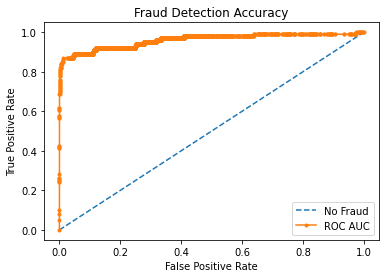

In [140]:
# generate a no fraud prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = classifier.predict(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 0]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Fraud: ROC AUC=%.3f' % (ns_auc))
print('ROC AUC: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Fraud')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC AUC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Fraud Detection Accuracy')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Now using greater number of layers

In [141]:
# Initialising the ANN
classifier2 = keras.Sequential()

In [142]:
# Adding the input layer and the first hidden layer
classifier2.add(keras.layers.Dense(units = 50 , kernel_initializer = 'uniform', activation = 'relu', input_dim =10))

In [143]:
# Adding the input layer and the second hidden layer
classifier2.add(keras.layers.Dense(units = 50 , kernel_initializer = 'uniform', activation = 'hard_sigmoid', input_dim =10))

In [144]:
# Adding the output layer
classifier2.add(keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [145]:
# Compiling the ANN
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [146]:
classifier2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________


In [147]:
# Fitting the ANN to the Training set
model2 = classifier2.fit(X_train.values, y_train.values, batch_size = 128, epochs = 10)

Epoch 1/10
1781/1781 [==============================] - 2s 862us/step - loss: 0.0912 - accuracy: 0.9827
Epoch 2/10
1781/1781 [==============================] - 2s 862us/step - loss: 0.0122 - accuracy: 0.9983
Epoch 3/10
1781/1781 [==============================] - 2s 857us/step - loss: 0.0104 - accuracy: 0.9984
Epoch 4/10
1781/1781 [==============================] - 2s 854us/step - loss: 0.0081 - accuracy: 0.9984
Epoch 5/10
1781/1781 [==============================] - 2s 853us/step - loss: 0.0058 - accuracy: 0.9983
Epoch 6/10
1781/1781 [==============================] - 2s 845us/step - loss: 0.0042 - accuracy: 0.9986
Epoch 7/10
1781/1781 [==============================] - 2s 859us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 8/10
1781/1781 [==============================] - 2s 849us/step - loss: 0.0037 - accuracy: 0.9993
Epoch 9/10
1781/1781 [==============================] - 2s 847us/step - loss: 0.0033 - accuracy: 0.9995
Epoch 10/10
1781/1781 [==============================] - 2s 849u

In [148]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
score2 = classifier2.evaluate(X_test, y_test)
score2

1781/1781 [==============================] - 1s 494us/step - loss: 0.0036 - accuracy: 0.9993


[0.0036354113835841417, 0.9992626905441284]

In [149]:
#Let's see how our model performed
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.82      0.74      0.78        99

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



No Fraud: ROC AUC=0.500
ROC AUC: ROC AUC=0.942


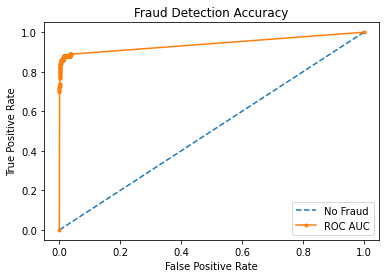

In [150]:
# generate a no fraud prediction (majority class)
ns_probs2 = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs2 = classifier2.predict(X_test)

# keep probabilities for the positive outcome only
lr_probs2 = lr_probs2[:, 0]

# calculate scores
ns_auc2 = roc_auc_score(y_test, ns_probs2)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

# summarize scores
print('No Fraud: ROC AUC=%.3f' % (ns_auc2))
print('ROC AUC: ROC AUC=%.3f' % (lr_auc2))

# calculate roc curves
ns_fpr2, ns_tpr2, _ = roc_curve(y_test, ns_probs2)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
# plot the roc curve for the model
pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--', label='No Fraud')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='ROC AUC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Fraud Detection Accuracy')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()